<a href="https://colab.research.google.com/github/gowtham66866/Inkers/blob/master/Quiz_7_2nd_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [13]:
# https://keras.io/
!pip install -q keras
import keras
import datetime
print(datetime.datetime.now())

2019-06-16 14:51:51.777695


In [14]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.utils import np_utils


# Multiple Inputs
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D,SeparableConv2D,DepthwiseConv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras import regularizers
from keras.layers.normalization import BatchNormalization

from keras.datasets import mnist
print(datetime.datetime.now())

2019-06-16 14:51:51.794888


### Load pre-shuffled MNIST data into train and test sets

In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

2019-06-16 14:51:52.112892


(60000, 28, 28)
2019-06-16 14:51:52.140901


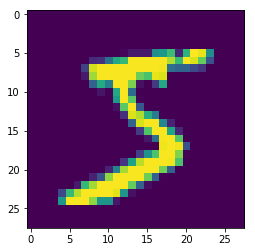

In [16]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [17]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-06-16 14:51:52.292017


In [18]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-06-16 14:51:52.413345


In [19]:
y_train[:10]
print(datetime.datetime.now())

2019-06-16 14:51:52.418952


In [20]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-06-16 14:51:52.431790


In [21]:
Y_train[:10]
print(datetime.datetime.now())

2019-06-16 14:51:52.437707


In [30]:
## MAIN BLOCK

from keras.layers import Activation
weight_decay = 0.005

x1 = Input(shape=(28,28,1))

x2 = Conv2D(64, kernel_size=3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(x1) #28
x2 = concatenate([x1, x2]) 
x3 = Conv2D(64, kernel_size=3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(x2) #28
x3 = concatenate([x1, x2, x3])
x4 = MaxPooling2D(pool_size=(2, 2))(x3) #16


x5 = Conv2D(64, kernel_size=3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(x4) #14
x5 = concatenate([x4, x5])
x6 = Conv2D(64, kernel_size=3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(x5) #14
x6 = concatenate([x4, x5, x6])
x7 = Conv2D(64, kernel_size=3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(x6) #14
x7 = concatenate([x4, x5, x6])
x8 = MaxPooling2D(pool_size=(2, 2))(x7) #8


x9 = Conv2D(64, kernel_size=3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(x8) #7
x9 = concatenate([x8, x9])
x10 = Conv2D(64, kernel_size=3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(x9) #7
x10 = concatenate([x8, x9, x10])
x11 = Conv2D(64, kernel_size=3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay))(x10) #7
x12 = Conv2D(10, kernel_size=7 )(x11) #1

x12 = Flatten()(x12)
output = Activation('softmax')(x12)

model = Model(inputs=[x1], outputs=output)
# summarize layers
print(model.summary())
print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 28, 28, 64)   640         input_6[0][0]                    
__________________________________________________________________________________________________
concatenate_29 (Concatenate)    (None, 28, 28, 65)   0           input_6[0][0]                    
                                                                 conv2d_36[0][0]                  
__________________________________________________________________________________________________
conv2d_37 (Conv2D)              (None, 28, 28, 64)   37504       concatenate_29[0][0]             
__________

In [31]:
model.summary()

print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 28, 28, 64)   640         input_6[0][0]                    
__________________________________________________________________________________________________
concatenate_29 (Concatenate)    (None, 28, 28, 65)   0           input_6[0][0]                    
                                                                 conv2d_36[0][0]                  
__________________________________________________________________________________________________
conv2d_37 (Conv2D)              (None, 28, 28, 64)   37504       concatenate_29[0][0]             
__________

In [33]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

2019-06-16 15:05:35.432413


In [34]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0616 15:05:39.681506 140238773585792 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0616 15:05:39.821403 140238773585792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 36s 600us/step - loss: 0.3022 - acc: 0.9531
Epoch 2/10
60000/60000 [==============================] - 29s 488us/step - loss: 0.1632 - acc: 0.9719
Epoch 3/10
60000/60000 [==============================] - 29s 489us/step - loss: 0.1401 - acc: 0.9754
Epoch 4/10
60000/60000 [==============================] - 29s 491us/step - loss: 0.1251 - acc: 0.9785
Epoch 5/10
60000/60000 [==============================] - 29s 488us/step - loss: 0.1174 - acc: 0.9798
Epoch 6/10
60000/60000 [==============================] - 29s 488us/step - loss: 0.1102 - acc: 0.9812
Epoch 7/10
60000/60000 [==============================] - 29s 490us/step - loss: 0.1057 - acc: 0.9814
Epoch 8/10
60000/60000 [==============================] - 29s 489us/step - loss: 0.1025 - acc: 0.9828
Epoch 9/10
60000/60000 [==============================] - 29s 490us/step - loss: 0.1002 - acc: 0.9827
Epoch 10/10
60000/60000 [==============================] - 29s 490us/step - loss: 

In [35]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-06-16 15:10:48.974013


In [36]:
print(score)
print(datetime.datetime.now())

[0.0895332954466343, 0.9848]
2019-06-16 15:10:53.941511
